In [2834]:
# Setup environment
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.semi_supervised import LabelSpreading


In [2835]:
# Ingest raw customer data
raw_data = pd.read_csv('dat/online_shoppers_intention.csv.gz')

In [2836]:
display(raw_data.head(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Task 1: Classification

1.1 Explore Raw Data (General EDA)

In [2837]:
# Check for Non-Null counts and column data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [2838]:
# Evaluate numerical columns
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [2839]:
# Chech distribution of Revenue columns
print(f"{round(raw_data.Revenue.mean() * 100, 2)}%")

15.47%


In [2840]:
# Check % of purchases from special day rows
special_day_rows = raw_data[raw_data.SpecialDay == 1]
print(special_day_rows.Revenue.value_counts())
print(f"{round(special_day_rows.Revenue.mean() * 100, 2)}%")

False    144
True      10
Name: Revenue, dtype: int64
6.49%


In [2841]:
# Check % of purchases from weekend shoppers
weekend_rows= raw_data[raw_data.Weekend == True]
print(weekend_rows.Revenue.value_counts())
print(f"{round(weekend_rows.Revenue.mean() * 100, 2)}%")

False    2369
True      499
Name: Revenue, dtype: int64
17.4%


In [2842]:
raw_data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [2843]:
# Convert Month column to numerical representations of the Months rather than string abbreviations
month_mapping = {
    'May': 5,
    'Nov': 11,
    'Mar': 3,
    'Dec': 12,
    'Oct': 10,
    'Sep': 9,
    'Aug': 8,
    'Jul': 7,
    'June': 6,
    'Feb': 2
}

raw_data['Month'] = raw_data.Month.map(month_mapping)

In [2844]:
# Confirm numerical month mapping
raw_data.Month.value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [2845]:
# Understand Categorical column values
print('Operating Systems:', raw_data.OperatingSystems.unique())
print('Browser:', raw_data.Browser.unique())
print('Region:', raw_data.Region.unique())
print('Traffic Type:', raw_data.TrafficType.unique())
print('Visitor Type:', raw_data.VisitorType.unique())

Operating Systems: [1 2 4 3 7 6 8 5]
Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region: [1 9 2 3 4 5 6 7 8]
Traffic Type: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Visitor Type: ['Returning_Visitor' 'New_Visitor' 'Other']


In [2846]:
raw_data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [2847]:
# Breakdown Visitor type and % revenue from each
print("Visitor Type % Revenue:")
print(f"    Returning: {round(raw_data[raw_data.VisitorType == 'Returning_Visitor']['Revenue'].mean() * 100, 2)}%")
print(f"    New: {round(raw_data[raw_data.VisitorType == 'New_Visitor']['Revenue'].mean() * 100, 2)}%")
print(f"    Other: {round(raw_data[raw_data.VisitorType == 'Other']['Revenue'].mean() * 100, 2)}%")

Visitor Type % Revenue:
    Returning: 13.93%
    New: 24.91%
    Other: 18.82%


In [2848]:
# Convert Visitor Type to numerical column for correlation and modeling purposes
visitor_type_mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}
raw_data['VisitorType'] = raw_data.VisitorType.map(visitor_type_mapping)

1.2 Advanced EDA

<AxesSubplot:>

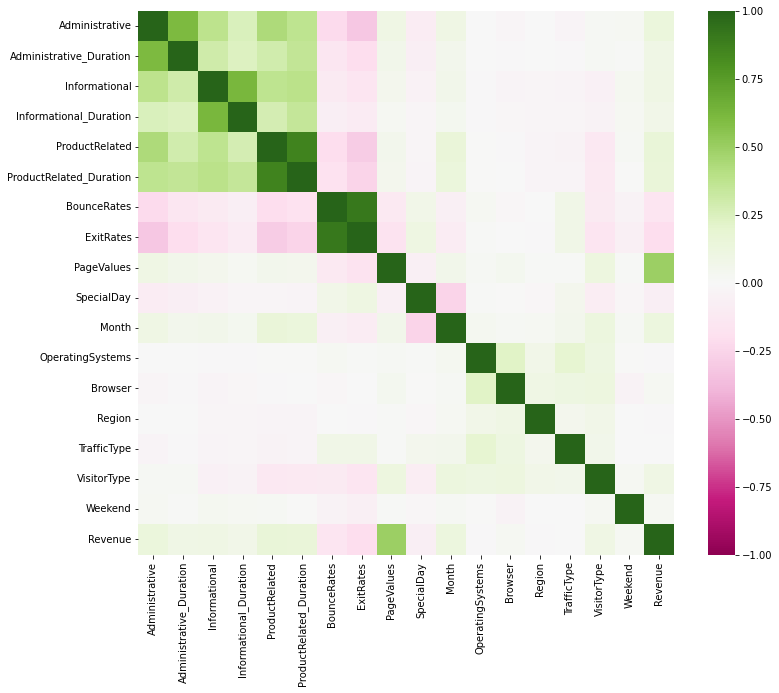

In [2849]:
# Check for multi-collinearity amongst independent variables (features)
plt.figure(figsize=(12, 10))
cor = raw_data.corr()
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG")

In [2850]:
# Explore correlation related to Bounce Rate and Exit Rate
display(raw_data[(raw_data.BounceRates == .2) & (raw_data.ExitRates != .2)])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [2851]:
# Drop BounceRate since Exit Rate effectively covers this statistic and gives more coverage to what the customer did during the session
clean_data = raw_data.drop('ExitRates', axis=1)

# Drop page count columns as duration will serve as a better indicator of customer interaction on website
clean_data['Total_Duration'] = clean_data.apply(
    lambda x: x.Administrative_Duration + x.Informational_Duration + x.ProductRelated_Duration, axis=1
)

clean_data = clean_data.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

In [2852]:
# Explore PageValues data leakage potential
print('Zero/No PageValue:')
print(f"No Revenue Count: {raw_data[(raw_data.PageValues == 0) & (raw_data.Revenue == 0)]['Revenue'].count()}")
print(f"No Revenue Count: {raw_data[(raw_data.PageValues == 0) & (raw_data.Revenue == 1)]['Revenue'].count()}")

print()

print('Positive PageValue:')
print(f"No Revenue Count: {raw_data[(raw_data.PageValues > 0) & (raw_data.Revenue == 0)]['Revenue'].count()}")
print(f"Revenue Count: {raw_data[(raw_data.PageValues > 0) & (raw_data.Revenue == 1)]['Revenue'].count()}")

Zero/No PageValue:
No Revenue Count: 9230
No Revenue Count: 370

Positive PageValue:
No Revenue Count: 1192
Revenue Count: 1538


In [2853]:
display(clean_data)

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0,0,1,0.200000,0.000000,0.0,2,1,1,1,1,0,False,False,0.000000
1,0,0,2,0.000000,0.000000,0.0,2,2,2,1,2,0,False,False,64.000000
2,0,0,1,0.200000,0.000000,0.0,2,4,1,9,3,0,False,False,0.000000
3,0,0,2,0.050000,0.000000,0.0,2,3,2,2,4,0,False,False,2.666667
4,0,0,10,0.020000,0.000000,0.0,2,3,3,1,4,0,True,False,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.007143,12.241717,0.0,12,4,6,1,1,0,True,False,1928.791667
12326,0,0,5,0.000000,0.000000,0.0,11,3,2,1,8,0,True,False,465.750000
12327,0,0,6,0.083333,0.000000,0.0,11,3,2,1,13,0,True,False,184.250000
12328,4,0,15,0.000000,0.000000,0.0,11,2,2,3,11,0,False,False,421.000000


Note:
- ExitRates was dropped from the df since it was highly correlated to BounceRates and BounceRates covers ExitRates "no other page visits" after 1 page attribute which is really what I care about with BounceRate (i.e. customers that visited the website then left with no other pages visited)
    - i.e. when BounceRate == .2 then ExitRate always equals .2
- Columns relating to page durations were dropped as well since they were slightly-highly correlated to their respective count columns.
    - Counts will cover the page splits when looking at whcih page was visited in further analysis and any durations that all be included in an all in one column "Total_Duration"

1.3 Train/Test Split

In [2854]:
# Create train and test df's
train_df = clean_data[clean_data.Month > 5]
test_df = clean_data[clean_data.Month < 4]

In [2855]:
# Print shapes of both df's
print(train_df.shape)
print(test_df.shape)

(6875, 15)
(2091, 15)


In [2856]:
# Chech distribution of Revenue columns in training dataset and test dataset
print(f"Training: {round(train_df.Revenue.mean() * 100, 2)}%")
print(f"Training Count: {train_df[train_df.Revenue == True]['Revenue'].count()}")
print(f"Test: {round(test_df.Revenue.mean() * 100, 2)}%")

Training: 19.61%
Training Count: 1348
Test: 9.33%


In [2857]:
# Undersample non-revenue rows to counter data imbalance for revenue rows
non_rev_rows = clean_data[(clean_data.Month > 5) & (clean_data.Revenue == 0)].sample(n=1348)
rev_rows = clean_data[(clean_data.Month > 5) & (clean_data.Revenue == 1)]
train_df = pd.concat((non_rev_rows,rev_rows))

In [2858]:
# Check shape and % Revenue to make sure training set is balanced
print(train_df.shape)
print(train_df.Revenue.mean())

(2696, 15)
0.5


In [2859]:
# Check if data is stratified
print('Operating Systems:', set(test_df.OperatingSystems.unique()).difference(set(train_df.OperatingSystems.unique())))
print('Browser:', set(test_df.Browser.unique()).difference(set(train_df.Browser.unique())))
print('Region:', set(test_df.Region.unique()).difference(train_df.Region.unique()))
print('Traffic Type:', set(test_df.TrafficType.unique()).difference(train_df.TrafficType.unique()))
print('Visitor Type:', set(test_df.VisitorType.unique()).difference(train_df.VisitorType.unique()))

Operating Systems: set()
Browser: {9}
Region: set()
Traffic Type: {9, 12, 14}
Visitor Type: set()


1.4 Feature Selection

In [2860]:
# Select features for model training and evaluation
features = ['BounceRates', 'VisitorType', 'PageValues']

In [2861]:
# Split train and test df's into X and y sets respectively
X_train = train_df[features]
y_train = train_df.pop('Revenue')

X_test = test_df[features]
y_test = test_df.pop('Revenue')

1.5 Model Fitting

In [2862]:
# Instantiate Model and Pipeline for Logistic Regression model
lr_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(class_weight='balanced'))])

In [2863]:
# Instantiate Model and Pipeline for Gradient Boosting Tree model
gb_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('gb', GradientBoostingClassifier())])

1.6 Performance

In [2864]:
# Predict and score model for LR model
lr_y_pred = lr_pipe.predict(X_test)

print(classification_report(y_test, lr_y_pred))


              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1896
        True       0.67      0.85      0.75       195

    accuracy                           0.95      2091
   macro avg       0.83      0.90      0.86      2091
weighted avg       0.96      0.95      0.95      2091



In [2865]:
# Predict and score model for GB model
gb_y_pred = gb_pipe.predict(X_test)

print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

       False       1.00      0.94      0.97      1896
        True       0.65      1.00      0.78       195

    accuracy                           0.95      2091
   macro avg       0.82      0.97      0.88      2091
weighted avg       0.97      0.95      0.95      2091



In [2866]:
# Get AUC for each model
print(f"LR AUC: {round(roc_auc_score(y_test, lr_y_pred) * 100, 2)}%")
print(f"GB AUC: {round(roc_auc_score(y_test, gb_y_pred) * 100 ,2)}%")

LR AUC: 90.45%
GB AUC: 97.18%


Model Hyperparameters:
- Logistic Regression
    - Since we are dealing with imbalanced data, the class weights hyperparameter was changes to "balanced" to ensure that there was a different weight for majority and moinority rows (offsetting the imbalance)
- Gradient Boosting
    - No hyperparameters were picked in this model since the model itself is iterative and with each iteration the model learns from itself by focusing on the errors it made in the last iterations (focusing more on the minority class which is most likely where the errors occured in an imbalanced dataset)
    - the learning rate was considered and used as a hyperparameter but the defult (.01) turned out to work the best with this model and dataset

Results:
- The balanced LR classifier and the GB classifier both offered similar results with the GB classifier slightly outperforming in regard to the F1 score (harmonic mean between Recall and Precision)
- Where the GB model really outperformed the LR model was the AUC metric which tracks the probability that a model ranks a random positive example higher than a random negative example when classifying unseen data
    - This is done by calculating the area under the curve (AUC) of a graph that is plotted with the True Positive Rate and False Positive Rate
- Accuracy was not accounted for due to the imbalanced dataset since this metric doesn't mean much in this situation

### Task 2: Customer Segmentation

In [2867]:
# Create X and y datasets for clustering
X = raw_data.iloc[:, :-1]
y = raw_data['Revenue']

In [2868]:
# Check shape for both X and y datasets
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


In [2869]:
# Normalize all features for clustering
X_norm = StandardScaler().fit_transform(X)

In [2870]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

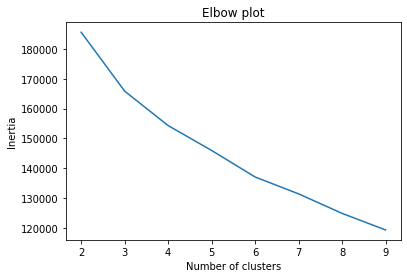

In [2871]:
# Display elbow plot to determine the amount of clusters to use in model (k)
visualize_elbow(X_norm, range(2,10))

In [2872]:
# Insantiate KMeans model
km = KMeans(n_clusters=4).fit(X_norm)

In [2873]:
# Check cluster sizes
for i in range(len(km.cluster_centers_)):
  print("Cluster", i)
  print("Size:", sum(km.labels_ == i))
  print()

Cluster 0
Size: 1514

Cluster 1
Size: 1008

Cluster 2
Size: 1708

Cluster 3
Size: 8100



In [2874]:
# Collect KMeans labels
raw_data['cluster_pca'] = km.labels_

# Split data by cluster label for further analysis
cluster0 = raw_data[raw_data.cluster_pca == 0]
cluster1 = raw_data[raw_data.cluster_pca == 1]
cluster2 = raw_data[raw_data.cluster_pca == 2]
cluster3 = raw_data[raw_data.cluster_pca == 3]

In [2875]:
# Print purchase ratios for each cluster to compare
print(f"purchase ratio: {cluster0.Revenue.mean()}")
print(f"purchase ratio: {cluster1.Revenue.mean()}")
print(f"purchase ratio: {cluster2.Revenue.mean()}")
print(f"purchase ratio: {cluster3.Revenue.mean()}")

purchase ratio: 0.2800528401585205
purchase ratio: 0.00496031746031746
purchase ratio: 0.25644028103044497
purchase ratio: 0.12851851851851853


How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
- 4 clusters
- Cluster 0, 1, and 3 all have relatively similar cluster sizes but cluster 2 has way higher of a count
- In regard to purchase ratio, clusters 2 and 3 have the highest ratios but cluster 3 is double the ratio of cluster 2
    - This could be a cluster size factor as well, being that cluster 2 has significantly more rows that any other cluster, the ratio could be gravitating closer to the real mean of the data
- Clustes 0 and 1 have almost the exact same size but cluster 0's purchase ration is a tenth of cluster 1 and as a result would suggest that cluster 0 revolves around consumers that visit the site but (almost) never make a purchase

In [2876]:
display(cluster0.iloc[:, :-11].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Administrative,1514.0,7.434610,4.597193,0.000,4.000000,7.000000,10.000000,27.000000
Administrative_Duration,1514.0,311.314656,361.121344,0.000,92.000000,199.923611,376.458333,3398.750000
Informational,1514.0,2.556803,2.329672,0.000,1.000000,2.000000,4.000000,24.000000
Informational_Duration,1514.0,219.234207,333.279872,0.000,6.000000,97.403333,269.766667,2549.375000
ProductRelated,1514.0,101.150594,83.760232,1.000,43.000000,80.000000,132.000000,705.000000
ProductRelated_Duration,1514.0,4007.407643,3817.423139,27.375,1690.901800,2989.188691,5242.355833,63973.522230
BounceRates,1514.0,0.006411,0.007431,0.000,0.001262,0.004255,0.008889,0.057801
ExitRates,1514.0,0.019647,0.011469,0.000,0.011765,0.017647,0.025133,0.100000


In [2877]:
display(cluster1.iloc[:, :-11].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Administrative,1008.0,0.038690,0.255021,0.000000,0.000000,0.0,0.0,4.000000
Administrative_Duration,1008.0,1.336971,22.175541,0.000000,0.000000,0.0,0.0,613.666667
Informational,1008.0,0.011905,0.125487,0.000000,0.000000,0.0,0.0,2.000000
Informational_Duration,1008.0,0.061706,1.391491,0.000000,0.000000,0.0,0.0,34.200000
ProductRelated,1008.0,2.964286,4.387931,0.000000,1.000000,1.0,3.0,71.000000
ProductRelated_Duration,1008.0,55.373046,193.229613,0.000000,0.000000,0.0,18.0,2251.280000
BounceRates,1008.0,0.170864,0.047011,0.000000,0.133333,0.2,0.2,0.200000
ExitRates,1008.0,0.182331,0.029332,0.092857,0.166667,0.2,0.2,0.200000


In [2878]:
display(cluster2.iloc[:, :-11].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Administrative,1708.0,2.496487,2.577331,0.0,0.000000,2.000000,4.000000,16.000000
Administrative_Duration,1708.0,82.819271,124.303601,0.0,0.000000,47.000000,110.675000,1652.000000
Informational,1708.0,0.279859,0.792550,0.0,0.000000,0.000000,0.000000,6.000000
Informational_Duration,1708.0,13.359375,56.008831,0.0,0.000000,0.000000,0.000000,763.000000
ProductRelated,1708.0,17.663349,16.917170,0.0,7.000000,13.000000,23.000000,162.000000
ProductRelated_Duration,1708.0,617.970666,671.802743,0.0,169.715000,410.887311,835.588571,5793.523810
BounceRates,1708.0,0.001887,0.006978,0.0,0.000000,0.000000,0.000000,0.080000
ExitRates,1708.0,0.018230,0.017317,0.0,0.006897,0.013333,0.024691,0.133333


In [2879]:
display(cluster3.iloc[:, :-11].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Administrative,8100.0,1.603333,2.320118,0.0,0.000000,0.000000,3.000000,16.000000
Administrative_Duration,8100.0,47.204950,89.689237,0.0,0.000000,0.000000,60.906250,993.000000
Informational,8100.0,0.228148,0.634870,0.0,0.000000,0.000000,0.000000,5.000000
Informational_Duration,8100.0,8.672107,38.166973,0.0,0.000000,0.000000,0.000000,844.000000
ProductRelated,8100.0,25.302469,23.471580,0.0,9.000000,18.000000,34.000000,179.000000
ProductRelated_Duration,8100.0,932.431579,986.538395,0.0,229.500000,606.583333,1294.729940,7515.583333
BounceRates,8100.0,0.010921,0.016497,0.0,0.000000,0.003279,0.015686,0.100000
ExitRates,8100.0,0.035360,0.026352,0.0,0.016214,0.028205,0.048485,0.200000


Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).
- Cluster0:
    - Little to no interaction with the website and as a result have low purchase rates as a group
    - Mean BounceRate = .17 which is very close to .2 meaning that this group almost always left after the first page that they visited
- Cluster 1:
    - Very similar to Cluster 2 but more of webpage surfers that might not be there to purchase anything (lower purchase rate)
    - Could be using the website as more of an informational page than anything else and does not get hooked to purchasing anything from the site
- Cluster 2:
    - Never bounced from the site, meaning that they always visit more than 1 page before exiting the site
    - This could be a large factor in the second largest purchase ratio amongst clusters
Cluster 3:
    - Spent significantly more time on the website than other clusters, and that definitely plays a large factor in the cluster's high purchase rate relative to others
    - These customers close to never bounced from the website with a max BounceRate of .057 out of .2 (indiciation of a Bounce)

### Task 3: Semi-Supervised Learning

In [2880]:
# Get training data from raw dataset and confirm the data split
train_df = raw_data[raw_data.Month.isin([6,7,8,9])]
print(train_df.Month.value_counts())

9    448
8    433
7    432
6    288
Name: Month, dtype: int64


In [2881]:
# Get test data for models to predict and confirm
test_df = raw_data[raw_data.Month.isin([2,3])]
print(test_df.Month.value_counts())

3    1907
2     184
Name: Month, dtype: int64


3.1 Classification performance on test data (unlabled data ignored)

In [2882]:
# Split test and train df's for model usage
X_train = np.array(train_df.iloc[:,:-2])
y_train = np.array(train_df.Revenue)
X_test = np.array(test_df.iloc[:,:-2])
y_test = np.array(test_df.Revenue)

In [2883]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1601, 17)
y_train shape: (1601,)
X_test shape: (2091, 17)
y_test shape: (2091,)


In [2884]:
# Instantiate Model and Pipeline for Logistic Regression model
lr_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(class_weight='balanced'))])

In [2885]:
# Predict and score model for LR model
lr_y_pred = lr_pipe.predict(X_test)

print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1896
        True       0.70      0.79      0.74       195

    accuracy                           0.95      2091
   macro avg       0.84      0.88      0.86      2091
weighted avg       0.95      0.95      0.95      2091



3.2 Semi-supervised model (with unlabeled data)

In [2886]:
# Get unlabeled_data dataset and verify the correct missing labels in the dataset
unlabeled_data = raw_data[raw_data.Month > 9]
unlabeled_data = unlabeled_data.drop(['Revenue', 'cluster_pca'], axis=1)
display(unlabeled_data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5455,0,0.0,0,0.0,1,207.570248,0.000000,0.007937,0.000000,0.0,10,2,2,1,5,0,False
5457,1,63.4,0,0.0,3,120.400000,0.000000,0.000000,42.293068,0.0,10,1,1,3,3,1,False
5461,7,56.3,0,0.0,15,315.400000,0.000000,0.011111,0.000000,0.0,10,2,2,1,2,1,False
5463,1,39.2,2,120.8,7,80.500000,0.000000,0.010000,0.000000,0.0,11,3,2,4,2,1,True
5464,3,89.6,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,11,2,2,1,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,0,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,0,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,0,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,False


In [2887]:
# Assemble training data with labeled and unlabeled data
X = np.vstack((X_train, unlabeled_data))

print(f"Labeled training data: {X_train.shape}")
print(f"Unlabeled training data: {unlabeled_data.shape}")
print(f"Combined training data: {X.shape}")
print(f"Train label data: {y_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Test label data: {y_test.shape}")

Labeled training data: (1601, 17)
Unlabeled training data: (5274, 17)
Combined training data: (6875, 17)
Train label data: (1601,)
Test data: (2091, 17)
Test label data: (2091,)


In [2888]:
display(train_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_pca
5456,3,40.200000,0,0.00,11,201.133333,0.000000,0.020000,0.000000,0.0,6,2,2,2,1,1,False,False,2
5458,6,618.066667,0,0.00,50,1342.083333,0.000000,0.004386,28.068050,0.0,6,2,2,6,11,1,False,True,2
5459,0,0.000000,0,0.00,2,7.000000,0.000000,0.100000,0.000000,0.0,6,2,2,7,1,0,False,False,3
5460,3,152.600000,0,0.00,28,608.883333,0.009375,0.031250,19.827709,0.0,7,2,2,7,13,0,False,True,3
5462,0,0.000000,0,0.00,20,419.600000,0.038095,0.068254,0.000000,0.0,8,3,2,3,3,0,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,6,142.911111,0,0.00,13,264.339682,0.000000,0.034510,0.000000,0.0,9,1,1,3,5,0,False,False,3
7976,12,975.646667,4,276.08,53,2822.623603,0.006667,0.017015,0.000000,0.0,9,3,2,8,2,0,True,False,0
7977,4,89.600000,2,12.00,13,182.500000,0.000000,0.014815,0.000000,0.0,9,2,2,1,2,0,False,False,3
7978,6,265.400000,0,0.00,6,161.600000,0.000000,0.022222,0.000000,0.0,8,1,1,3,3,1,False,False,2


In [2889]:
# Assemble test dataset with dummy variables and labeled test data for test rows
X_dummy = np.ones((5274, 1)) * -1
y = np.vstack((np.array(y_train).reshape(-1,1), X_dummy))
print(y.shape)

(6875, 1)


In [2890]:
ls = LabelSpreading(kernel='knn').fit(X,y)

/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2891]:
semi_sup_preds = ls.transduction_[-5274:]

In [2892]:
semi_y = np.vstack((np.array(y_train).reshape(-1,1), semi_sup_preds.reshape(-1,1)))

In [2893]:
# Instantiate Model and Pipeline for Logistic Regression model
lr_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

lr_pipe.fit(X, semi_y)

/opt/homebrew/Caskroom/miniforge/base/envs/FB/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(class_weight='balanced'))])

In [2894]:
# Predict and score model for LR model
lr_y_pred = lr_pipe.predict(X_test)

print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

       False       1.00      0.16      0.28      1896
        True       0.11      1.00      0.20       195

    accuracy                           0.24      2091
   macro avg       0.55      0.58      0.24      2091
weighted avg       0.92      0.24      0.27      2091



Compare and contrast performance difference on test dataset between labels only and labels & self-labels
- The performance on the test data without unlabeled data was a lot better than with the artifical self-labels.
- The only metric that was better in the self-label data was recall, but that is not that big of a deal when precision is very low
    - As a result of the very low precision, the F1 score was brought way down since it is calculated as the harmonic mean of recall and precision
- F1 score is the most important metric here and we can see that the supervised model scored a lot higher in this metric
- Supevised model performed better than semi-supervised model in this scenario